# Imports and configs

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('./data/all_games.csv')

# Basic data glimpse

In [4]:
data.shape

(66080, 67)

In [5]:
data.head()

,Unnamed: 0,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,away_team_goal_count,total_goal_count,total_goals_at_half_time,home_team_goal_count_half_time,away_team_goal_count_half_time,home_team_goal_timings,away_team_goal_timings,home_team_corner_count,away_team_corner_count,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,home_team_first_half_cards,home_team_second_half_cards,away_team_first_half_cards,away_team_second_half_cards,home_team_shots,away_team_shots,home_team_shots_on_target,away_team_shots_on_target,home_team_shots_off_target,away_team_shots_off_target,home_team_fouls,away_team_fouls,home_team_possession,away_team_possession,Home Team Pre-Match xG,Away Team Pre-Match xG,team_a_xg,team_b_xg,average_goals_per_match_pre_match,btts_percentage_pre_match,over_15_percentage_pre_match,over_25_percentage_pre_match,over_35_percentage_pre_match,over_45_percentage_pre_match,over_15_HT_FHG_percentage_pre_match,over_05_HT_FHG_percentage_pre_match,over_15_2HG_percentage_pre_match,over_05_2HG_percentage_pre_match,average_corners_per_match_pre_match,average_cards_per_match_pre_match,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,stadium_name
0,0,1249669800,Aug 07 2009 - 6:30pm,complete,NaN,Wolfsburg,Stuttgart,Felix Brych,1.0,0.0,0.0,1.35,1.53,2,0,2,0,0,0,"71,82",NaN,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,VOLKSWAGEN ARENA (Wolfsburg)
1,1,1249738200,Aug 08 2009 - 1:30pm,complete,NaN,Borussia Dortmund,Köln,Wolfgang Stark,1.0,0.0,0.0,2.00,1.35,1,0,1,0,0,0,75,NaN,-1,-1,0,0,1,0,0,0,0,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Signal-Iduna-Park (Dortmund)
2,2,1249738200,Aug 08 2009 - 1:30pm,complete,NaN,Nürnberg,Schalke 04,Knut Kircher,1.0,0.0,0.0,1.12,1.76,1,2,3,1,0,1,88,"36,50",-1,-1,2,0,1,0,1,1,0,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Max-Morlock-Stadion (Nürnberg)
3,3,1249738200,Aug 08 2009 - 1:30pm,complete,NaN,Werder Bremen,Eintracht Frankfurt,NaN,1.0,0.0,0.0,1.76,1.18,2,3,5,4,2,2,"13,44","6,42,71",-1,-1,2,1,2,0,1,2,0,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,wohninvest WESERSTADION (Bremen)
4,4,1249738200,Aug 08 2009 - 1:30pm,complete,NaN,Hertha BSC,Hannover 96,Guido Winkmann,1.0,0.0,0.0,0.53,0.82,1,0,1,0,0,0,82,NaN,-1,-1,3,0,2,0,0,3,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Olympiastadion Berlin (Berlin)


In [6]:
data.isna().sum()

Unnamed: 0                                 0
timestamp                                  0
date_GMT                                   0
status                                     0
attendance                             21359
home_team_name                             0
away_team_name                             0
referee                                24472
Game Week                               8325
Pre-Match PPG (Home)                       0
Pre-Match PPG (Away)                       0
home_ppg                                   0
away_ppg                                   0
home_team_goal_count                       0
away_team_goal_count                       0
total_goal_count                           0
total_goals_at_half_time                   0
home_team_goal_count_half_time             0
away_team_goal_count_half_time             0
home_team_goal_timings                 15583
away_team_goal_timings                 21901
home_team_corner_count                     0
away_team_

In [10]:
data.dtypes

Unnamed: 0                               int64
timestamp                                int64
date_GMT                                object
status                                  object
attendance                             float64
home_team_name                          object
away_team_name                          object
referee                                 object
Game Week                              float64
Pre-Match PPG (Home)                   float64
Pre-Match PPG (Away)                   float64
home_ppg                               float64
away_ppg                               float64
home_team_goal_count                     int64
away_team_goal_count                     int64
total_goal_count                         int64
total_goals_at_half_time                 int64
home_team_goal_count_half_time           int64
away_team_goal_count_half_time           int64
home_team_goal_timings                  object
away_team_goal_timings                  object
home_team_cor

## Missingno matrix

The missingno.matrix nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion.

<Axes: >

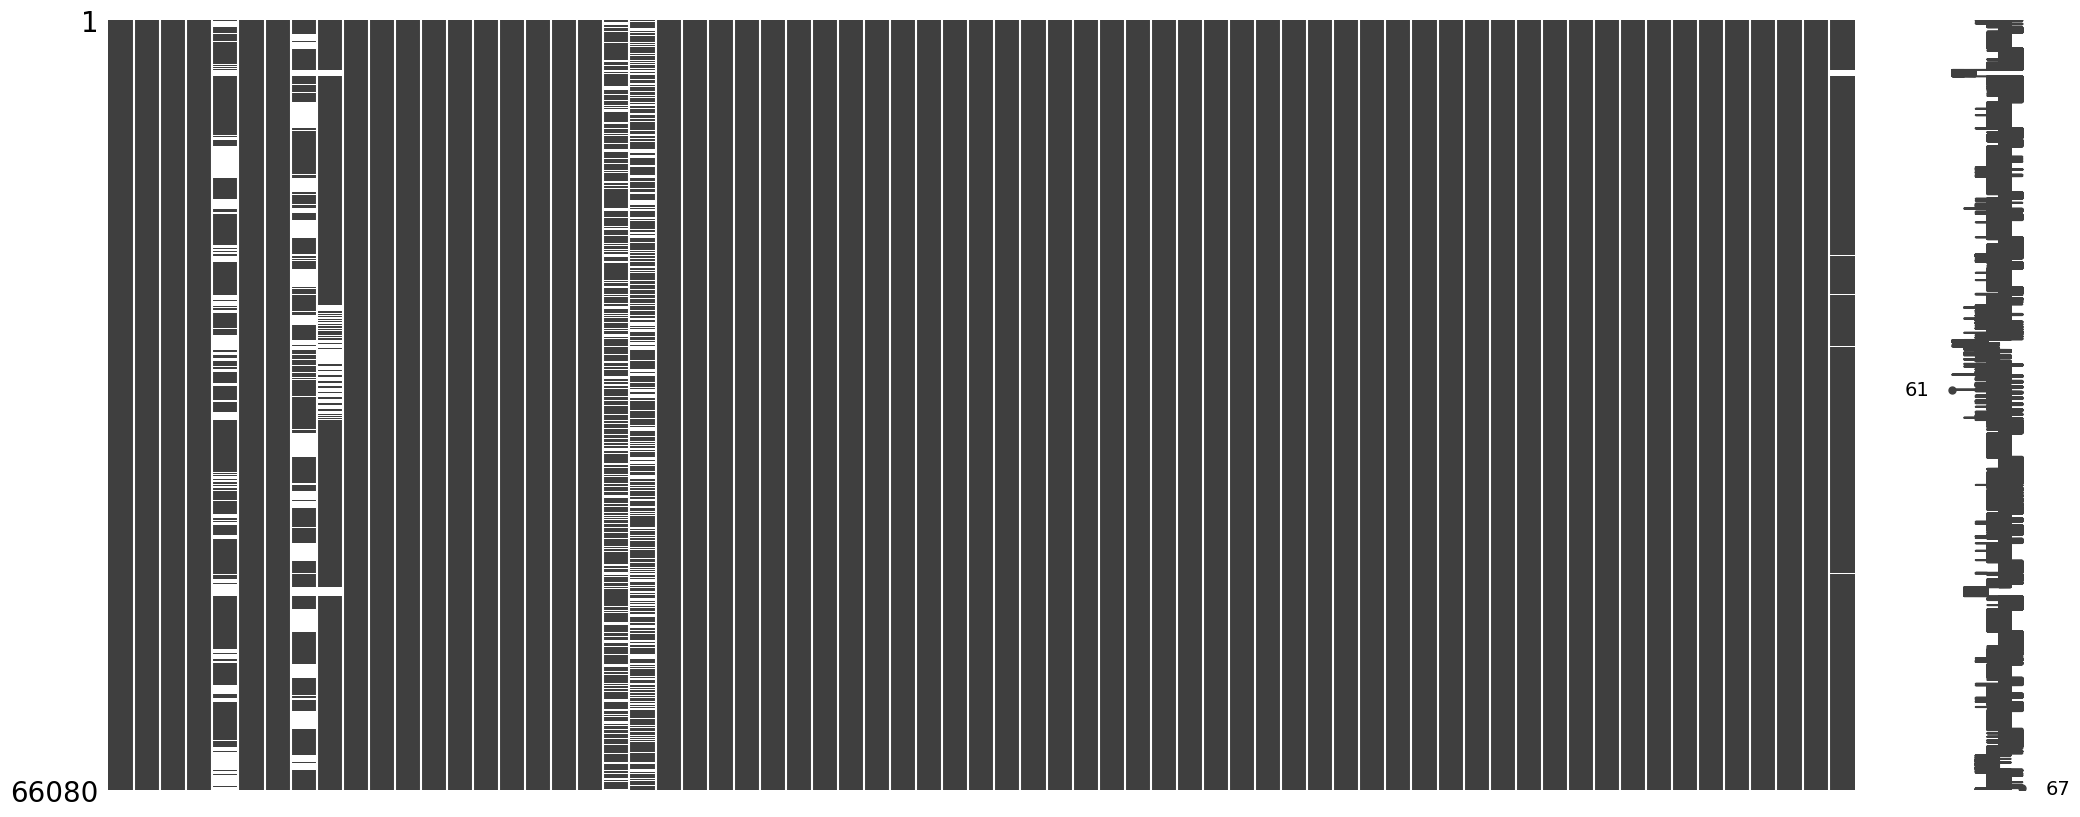

In [8]:
missingno.matrix(data)

## Missingno correlation matrix
The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another.

<Axes: >

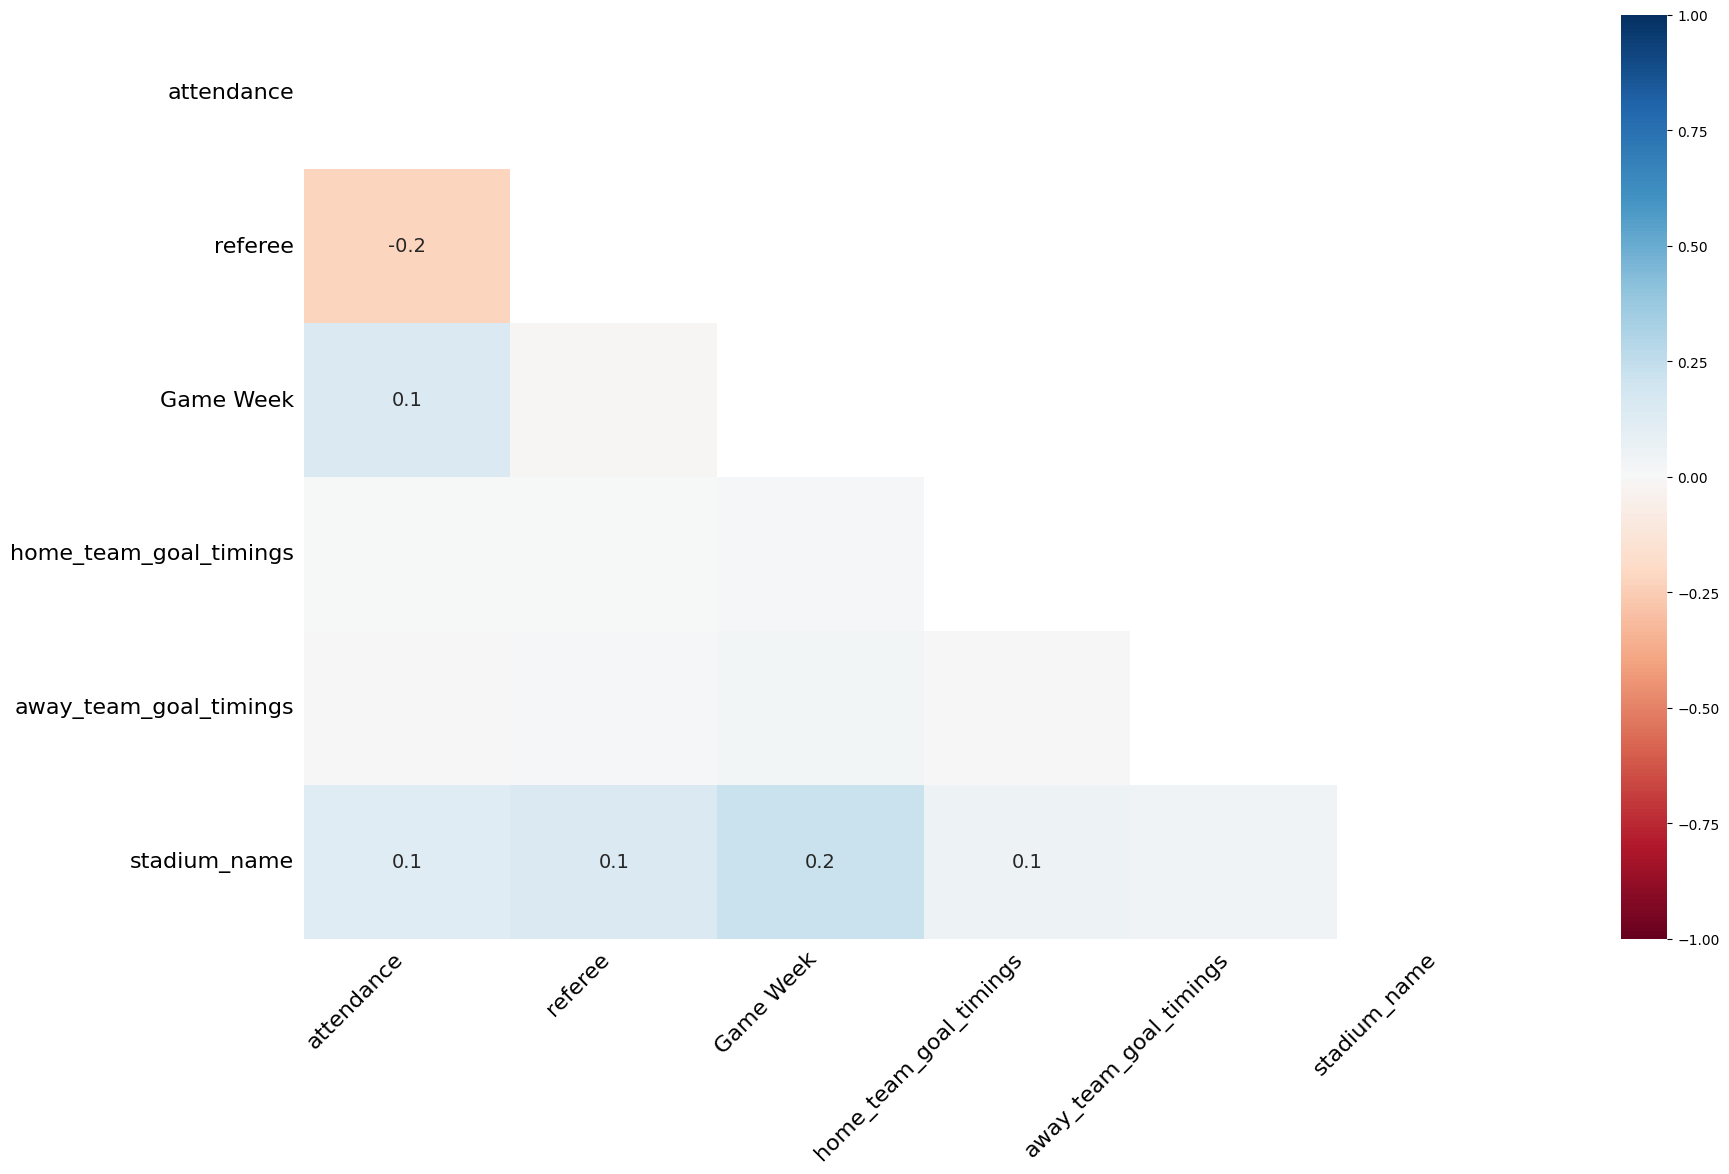

In [9]:
missingno.heatmap(data)

## Missingno dendrogram

The dendrogram allows to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap.

<Axes: >

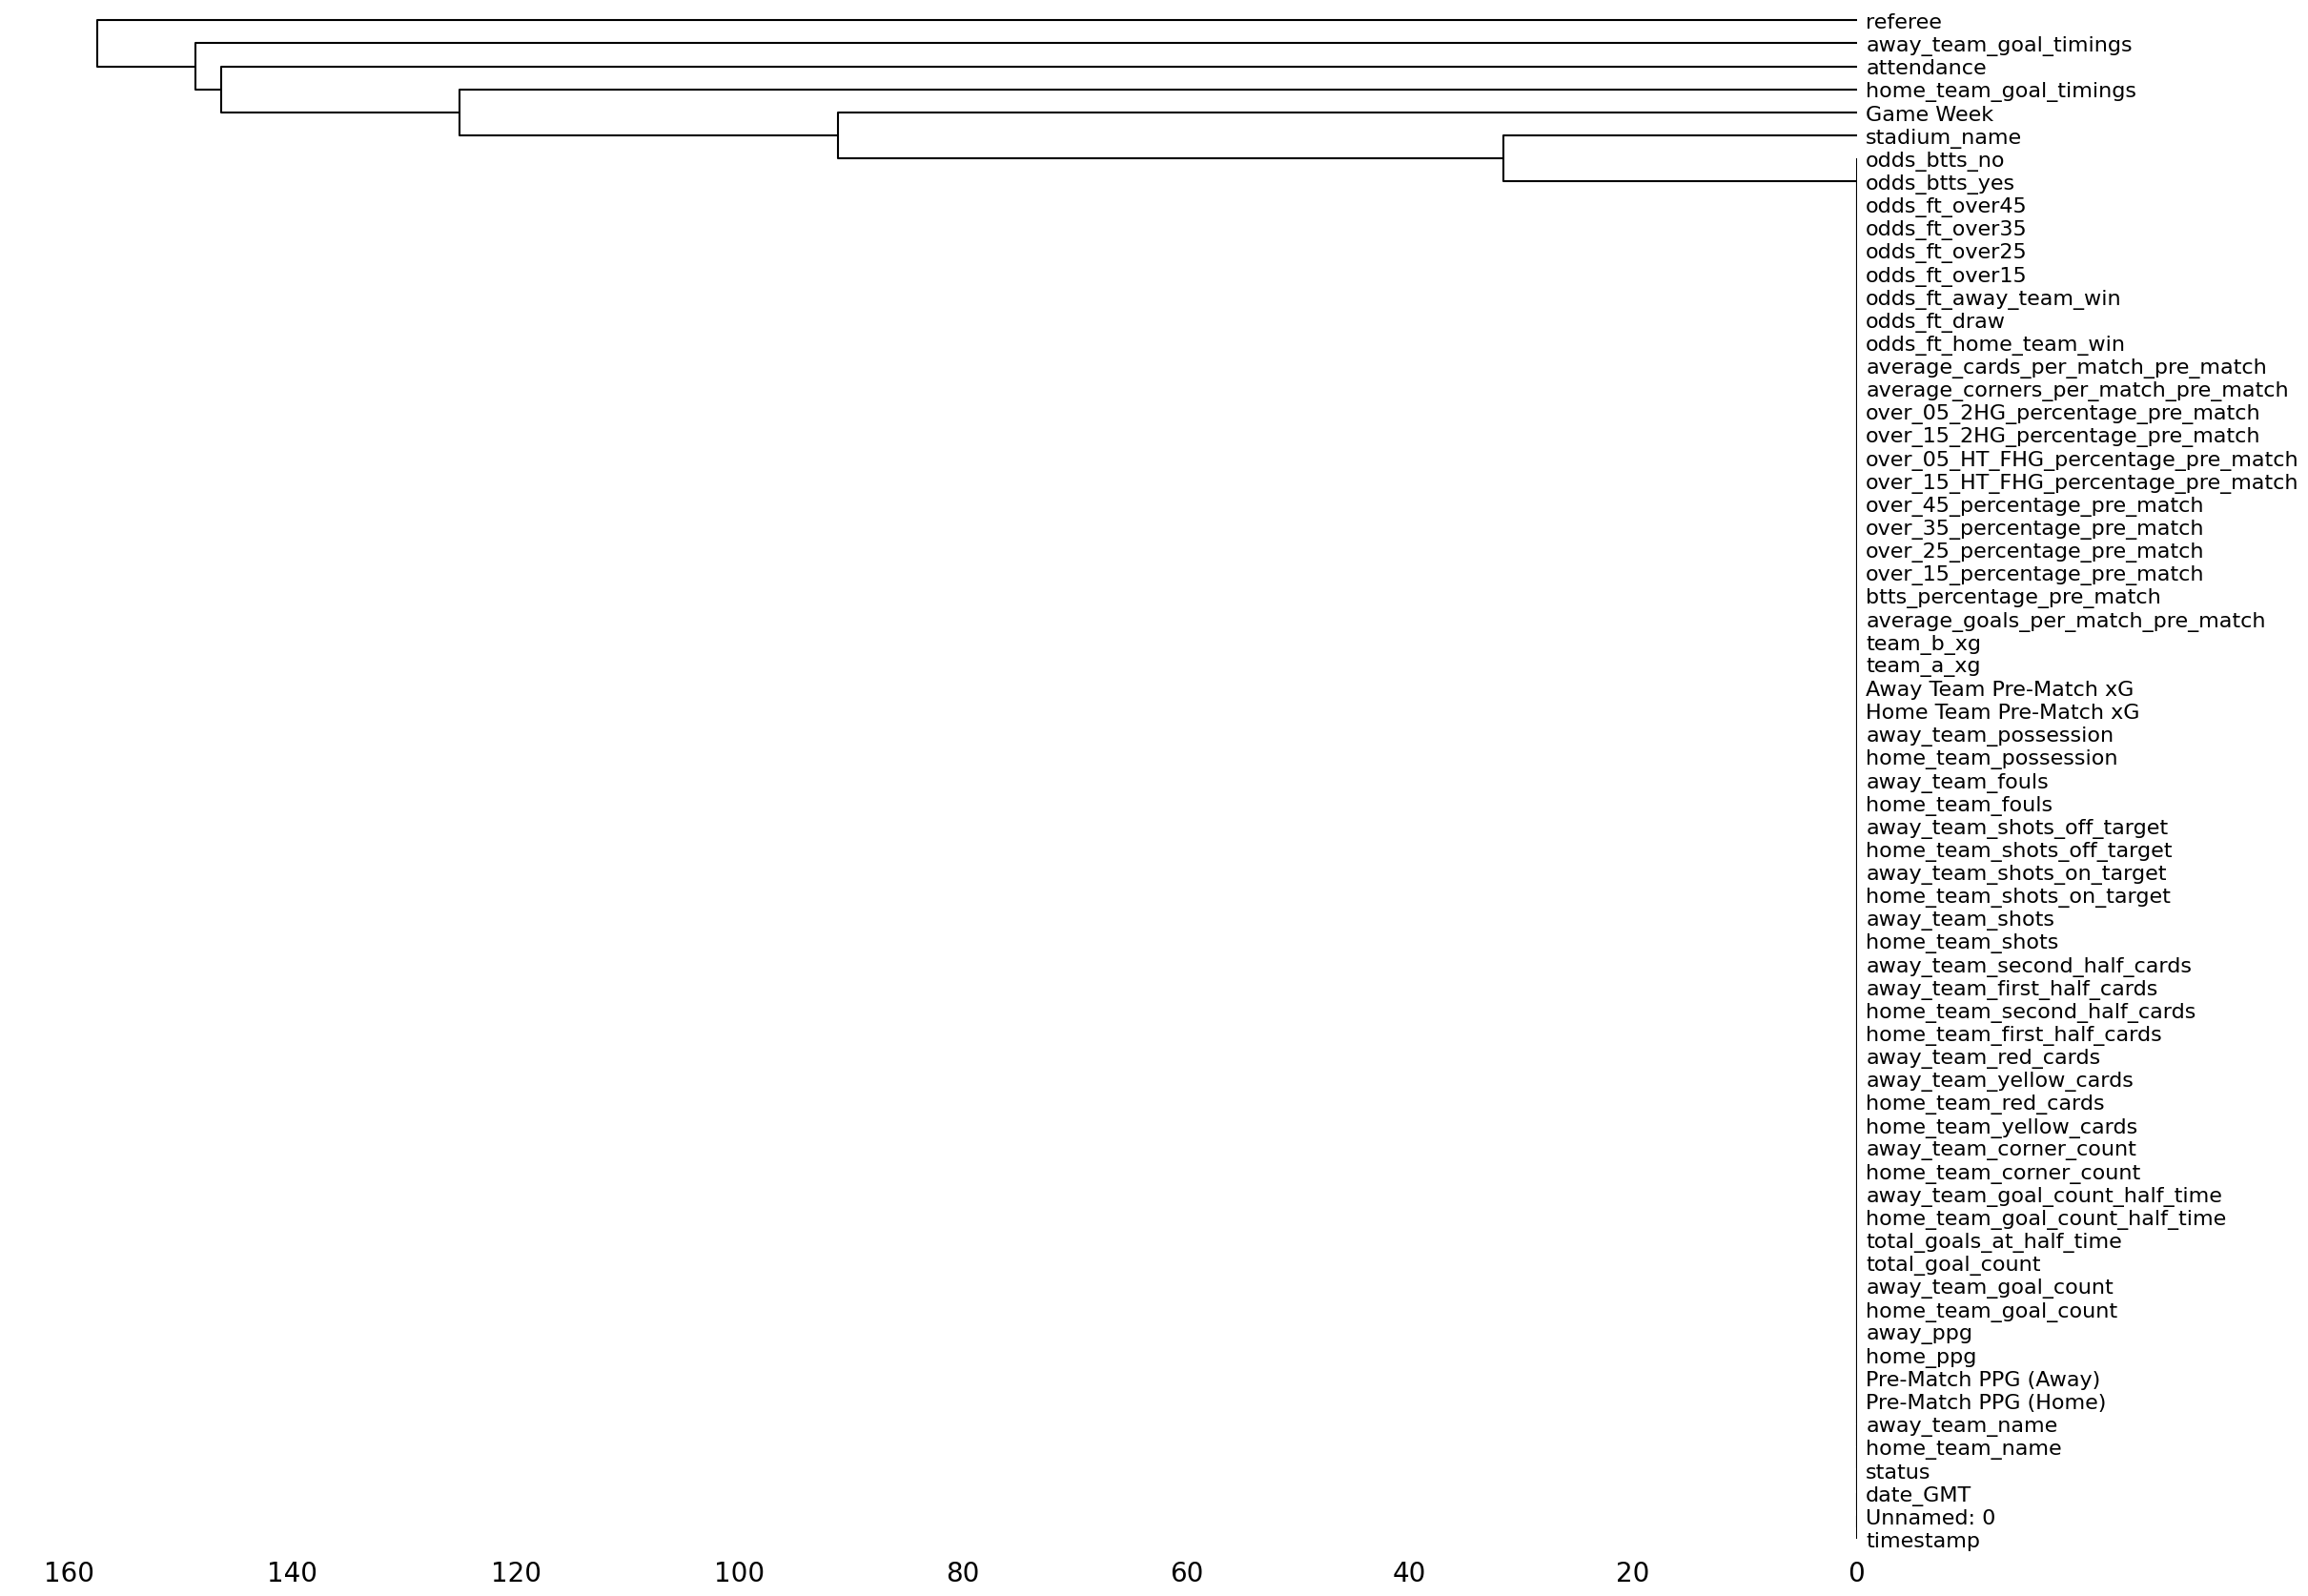

In [11]:
missingno.dendrogram(data)

# Data tidying

Simple pipeline-ish method for cleaning data.

In [12]:
def clean_data(data):
    #transforming date variable
    data['date_GMT'] = pd.to_datetime(data['date_GMT'])
    data['date'] = pd.to_datetime(data['date_GMT'].dt.date)
    data['time'] = data['date_GMT'].dt.time
    
    #adding aggregated variables
    data['corners_total'] = data['home_team_corner_count'] + data['away_team_corner_count']
    data['yellow_cards_total'] = data['home_team_yellow_cards'] + data['away_team_yellow_cards']
    data['red_cards_total'] = data['home_team_red_cards'] + data['away_team_red_cards']
    data['cards_total'] = data['yellow_cards_total'] + data['red_cards_total']
    data['shots_total'] = data['home_team_shots'] + data['away_team_shots']
    data['shots_on_target_total'] = data['home_team_shots_on_target'] + data['away_team_shots_on_target']
    data['shots_off_target_total'] = data['home_team_shots_off_target'] + data['away_team_shots_off_target']
    data['fouls_total'] = data['home_team_fouls'] + data['away_team_fouls']
    
    #getting stadium names without city in brackets
    # data['base_name'] = data['stadium_name'].str.replace(r" \(.*\)$", "", regex=True)

    # city_map = data[data['stadium_name'].str.contains(r"\(.*\)")].copy()
    # city_map['city'] = city_map['stadium_name'].str.extract(r"\((.*?)\)")[0]
    # city_map = city_map.groupby('base_name')['city'].agg(pd.Series.mode).to_dict()

    # #filling stadium names without city in brackets
    # data['normalized_stadium'] = data.apply(lambda row: f"{row['base_name']} ({city_map.get(row['base_name'], 'Unknown')})" if '(' not in row['stadium_name'] else row['stadium_name'], axis=1)

    #dropping unnecessary features
    data.drop(['Unnamed: 0', 'timestamp', 'status', 'home_team_goal_timings', 'away_team_goal_timings', 'date_GMT'], axis=1, inplace=True)
    
    #setting one of the target variable - result of the game
    data['result'] = np.where(data['home_team_goal_count'] == data['away_team_goal_count'], 0, np.where(data['home_team_goal_count'] > data['away_team_goal_count'], 1, 2))
    
    def assign_season(date):
        year = date.year
        if date.month >= 8:  # Sezon zaczyna się w sierpniu
            return f'{str(year)[2:]}/{str(year+1)[2:]}'
        else:
            return f'{str(year-1)[2:]}/{str(year)[2:]}'
    
    data['season'] = data['date'].apply(assign_season)
    
    return data

In [13]:
data = clean_data(data)

C:\Users\Łukasz\AppData\Local\Temp\ipykernel_19332\694537563.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date_GMT'] = pd.to_datetime(data['date_GMT'])


In [ ]:
"""
flow do czyszczenia danych:
- wstawienie braków (tyle ile możliwe): średnia frekwencja w sezonie według stadionu, uzupełnienie numeru kolejki
"""

In [14]:
data.shape

(66080, 73)

In [15]:
data_clean = data[~(data == -1).any(axis=1)]

In [16]:
data_clean.shape

(52919, 73)

In [18]:
data_clean.sort_values(by='season')

,attendance,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,away_team_goal_count,total_goal_count,total_goals_at_half_time,home_team_goal_count_half_time,away_team_goal_count_half_time,home_team_corner_count,away_team_corner_count,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,home_team_first_half_cards,home_team_second_half_cards,away_team_first_half_cards,away_team_second_half_cards,home_team_shots,away_team_shots,home_team_shots_on_target,away_team_shots_on_target,home_team_shots_off_target,away_team_shots_off_target,home_team_fouls,away_team_fouls,home_team_possession,away_team_possession,Home Team Pre-Match xG,Away Team Pre-Match xG,team_a_xg,team_b_xg,average_goals_per_match_pre_match,btts_percentage_pre_match,over_15_percentage_pre_match,over_25_percentage_pre_match,over_35_percentage_pre_match,over_45_percentage_pre_match,over_15_HT_FHG_percentage_pre_match,over_05_HT_FHG_percentage_pre_match,over_15_2HG_percentage_pre_match,over_05_2HG_percentage_pre_match,average_corners_per_match_pre_match,average_cards_per_match_pre_match,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,stadium_name,date,time,corners_total,yellow_cards_total,red_cards_total,cards_total,shots_total,shots_on_target_total,shots_off_target_total,fouls_total,result,season
24695,NaN,Sevilla FC,CSKA Moskva,Viktor Kassai,NaN,2.00,1.57,1.75,1.40,1,2,3,2,1,1,6,2,1,0,4,0,0,1,1,3,14,10,7,6,7,4,15,21,50,50,0.00,0.00,0.00,0.00,2.79,72,79,50,29,14,15,86,50,86,8.43,3.43,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,Estadio Ramón Sánchez Pizjuán (Sevilla),2010-03-16,19:45:00,8,5,0,5,24,13,11,36,2,09/10
24645,NaN,Arsenal,AZ,NaN,NaN,2.60,0.67,1.92,0.67,4,1,5,2,2,0,5,4,0,0,1,0,0,0,0,1,12,8,8,4,4,4,14,14,50,50,0.00,0.00,0.00,0.00,2.34,64,84,20,20,10,10,57,47,100,11.66,3.13,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,Emirates Stadium (London),2009-11-04,19:45:00,9,1,0,1,20,12,8,28,1,09/10
24644,NaN,Standard Liège,Olympiakos Piraeus,Nicola Rizzoli,NaN,0.33,2.57,0.83,1.83,2,0,2,1,1,0,2,6,3,0,2,0,1,2,1,1,8,8,5,4,3,4,19,14,50,50,0.00,0.00,0.00,0.00,2.60,57,86,41,17,17,48,55,48,93,9.66,3.47,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,Stade Maurice Dufrasne (Liège (Luik)),2009-11-04,19:45:00,8,5,0,5,16,9,7,33,1,09/10
24643,NaN,FC Unirea Urziceni,Rangers,NaN,NaN,1.33,0.33,1.33,0.33,1,1,2,0,0,0,5,5,1,0,2,0,0,1,1,1,19,12,10,8,9,4,9,10,50,50,0.00,0.00,0.00,0.00,3.50,84,100,50,50,50,33,84,50,100,5.33,3.33,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,Stadionul Steaua (old) (Bucureşti),2009-11-04,18:45:00,10,3,0,3,31,18,13,19,0,09/10
24642,NaN,Rubin Kazan,FC Barcelona,NaN,NaN,1.33,1.33,1.00,1.83,0,0,0,0,0,0,3,6,2,0,1,0,0,2,0,1,6,15,2,7,4,8,11,12,50,50,0.00,0.00,0.00,0.00,2.34,67,84,50,17,0,17,84,50,67,11.67,3.33,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,Central'nyj stadion Kazan' (Kazan'),2009-11-04,17:30:00,9,3,0,3,21,9,12,23,0,09/10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28206,NaN,CFR Cluj,Slavia Praha,NaN,4.0,1.78,1.89,1.64,1.75,2,0,2,1,1,0,4,7,3,0,6,0,1,2,2,4,6,20,4,6,2,14,10,13,24,76,2.16,1.91,0.83,2.09,2.17,33,61,28,17,11,28,67,28,56,13.06,5.00,4.0,3.30,2.00,1.33,2.30,3.60,7.0,2.00,1.73,Stadionul Dr. Constantin Rădulescu,2022-10-13,16:45:00,11,9,0,9,26,10,16,23,1,22/23
28207,NaN,Slovan Bratislava,Basel,NaN,4.0,1.40,1.78,1.60,1.65,3,3,6,2,1,1,4,5,1,0,4,0,0,1,2,2,8,12,6,7,2,5,10,16,56,44,2.23,1.39,1.16,1.53,1.80,27,64,21,6,0,37,48,21,59,11.20,6.60,2.7,3.25,2.63,1.30,1.95,3.40,6.5,1.67,2.10,Štadión Pasienky,2022-10-13,16:45:00,9,5,0,5,20,13,7,26,0,22/23
28208,NaN,FCSB,Silkeborg,NaN,4.0,1.44,1.00,1.17,1.00,0,5,5,2,0,2,2,5,3

In [ ]:
data_clean